Code to plot Cutflow plots for the processes

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
plt.style.use(hep.style.CMS)

def read_file(f):
    df = pd.read_csv(f, sep="\t")
    return df

def get_combined_data(directory):
    dfs = [read_file(os.path.join(directory, f)) for f in os.listdir(directory)]
    SumWeight = np.sum([df.sumWeight[0] for df in dfs])
    DF = pd.concat(dfs, ignore_index=True)
    DF['SumWeight']= SumWeight
    return DF
  
def gen_colors(labels):
    c = {'ttZ': "#3f90da", 'ttW': "#bd1f01" , 'DYJets': "#ffa90e", 'ttH': "#94a4a2", 'tt': "#832db6", 'ZZ': "#a96b59",
         'WZ': "#b9ac70", 'other':  "#e76300", 'ZZ2': "#717581", 'WZ2': "#92dadd", 'ttG': 'g', 'tWZ': 'b'}
    return [c[lab] for lab in labels]
    
def get_hist(DF, nbins, var):
    DF['w'] = DF.genWeights * (DF.N_exp / DF.SumWeight)
    DF['w2'] = np.square(DF.w)
    if type(nbins)==int:
        clipped = DF[var]
    else:
        clipped = np.clip(DF[var], nbins[0], nbins[-1])
    
    hist, _ = np.histogram(clipped, bins=nbins, weights=DF.w)
    w2, _ = np.histogram(clipped, bins=nbins, weights=DF.w2)
    return hist, w2

def combine_bins(data):
    return [sum(x) for x in zip(*data)]

def combine_w2s(w2s):
    return [np.sqrt(sum(np.square(x))) for x in zip(*w2s)]

In [6]:
def get_ttZ2lnum(path, bins, var):
    DF_ttZ = get_combined_data('{}/output_TTZ'.format(path))
    DF_ttG = get_combined_data('{}/output_TTG'.format(path))
    DF_ttW = get_combined_data('{}/output_TTW'.format(path))
    DF_ttH = get_combined_data('{}/output_TTH'.format(path))
    DF_tWZ = get_combined_data('{}/output_TWZ'.format(path))
    DF_tt = get_combined_data('{}/output_TT1'.format(path))
    DF_WZ = get_combined_data('{}/output_WZ'.format(path))
    DF_WZ2 = get_combined_data('{}/output_WZ2'.format(path))
    DF_DY1 = get_combined_data('{}/output_DY1'.format(path))
    DF_DY2 = get_combined_data('{}/output_DY2'.format(path))
    DF_DY3 = get_combined_data('{}/output_DY3'.format(path))
    DF_ZZ1 = get_combined_data('{}/output_ZZ1'.format(path))
    DF_ZZ2 = get_combined_data('{}/output_ZZ2'.format(path))
    hist_ttZ, w2_ttZ = get_hist(DF_ttZ, bins, var)
    hist_ttW, w2_ttW = get_hist(DF_ttW, bins, var)
    hist_ttH, w2_ttH = get_hist(DF_ttH, bins, var)
    hist_ttG, w2_ttG = get_hist(DF_ttG, bins, var)
    hist_tWZ, w2_tWZ = get_hist(DF_tWZ, bins, var)
    hist_tt, w2_tt = get_hist(DF_tt, bins, var)
    hist_WZ, w2_WZ = get_hist(DF_WZ, bins, var)
    hist_WZ2, w2_WZ2 = get_hist(DF_WZ2, bins, var)
    hist_DY1, w2_DY1 = get_hist(DF_DY1, bins, var)
    hist_DY2, w2_DY2 = get_hist(DF_DY2, bins, var)
    hist_DY3, w2_DY3 = get_hist(DF_DY3, bins, var)
    hist_ZZ1, w2_ZZ1 = get_hist(DF_ZZ1, bins, var)
    hist_ZZ2, w2_ZZ2 = get_hist(DF_ZZ2, bins, var)
    hist_list = [hist_ttZ, hist_ttW, hist_ttH, hist_ttG, hist_tWZ, hist_WZ, hist_WZ2, hist_ZZ1, hist_ZZ2, hist_tt, hist_DY1, hist_DY2, hist_DY3]
    w2_list = [w2_ttZ, w2_ttW, w2_ttH, w2_ttG, w2_tWZ, w2_WZ, w2_WZ2, w2_ZZ1, w2_ZZ2, w2_tt, w2_DY1, w2_DY2, w2_DY3]
    other = np.sum([hist_list[1], hist_list[2], hist_list[3], hist_list[4]])
    WZ = np.sum([hist_list[5], hist_list[6]])
    ZZ = np.sum([hist_list[7], hist_list[8]])
    tt = hist_list[9][0]
    ttZ = hist_list[0][0]
    DYJets= np.sum(hist_list[10:])
    tot = np.sum(hist_list)
    num = [other, WZ, ZZ, tt, DYJets, ttZ]/tot
    w2s = [np.sqrt(sum(np.square(x))) for x in zip(*w2_list)]/tot
    return num, w2s

def get_ttZ3lnum(path, bins, var):
    DF_ttZ = get_combined_data('{}/output_TTZ'.format(path))
    DF_ttG = get_combined_data('{}/output_TTG'.format(path))
    DF_ttW = get_combined_data('{}/output_TTW'.format(path))
    DF_ttH = get_combined_data('{}/output_TTH'.format(path))
    DF_tWZ = get_combined_data('{}/output_TWZ'.format(path))
    DF_tt = get_combined_data('{}/output_TT1'.format(path))
    DF_WZ = get_combined_data('{}/output_WZ'.format(path))
    DF_WZ2 = get_combined_data('{}/output_WZ2'.format(path))
    DF_DY1 = get_combined_data('{}/output_DY1'.format(path))
    DF_DY2 = get_combined_data('{}/output_DY2'.format(path))
    DF_DY3 = get_combined_data('{}/output_DY3'.format(path))
    hist_ttZ, w2_ttZ = get_hist(DF_ttZ, bins, var)
    hist_ttW, w2_ttW = get_hist(DF_ttW, bins, var)
    hist_ttH, w2_ttH = get_hist(DF_ttH, bins, var)
    hist_ttG, w2_ttG = get_hist(DF_ttG, bins, var)
    hist_tWZ, w2_tWZ = get_hist(DF_tWZ, bins, var)
    hist_tt, w2_tt = get_hist(DF_tt, bins, var)
    hist_WZ, w2_WZ = get_hist(DF_WZ, bins, var)
    hist_WZ2, w2_WZ2 = get_hist(DF_WZ2, bins, var)
    hist_DY1, w2_DY1 = get_hist(DF_DY1, bins, var)
    hist_DY2, w2_DY2 = get_hist(DF_DY2, bins, var)
    hist_DY3, w2_DY3 = get_hist(DF_DY3, bins, var)
    hist_list = [hist_ttZ, hist_ttW, hist_ttH, hist_ttG, hist_tWZ, hist_WZ, hist_WZ2, hist_tt, hist_DY1, hist_DY2, hist_DY3]
    w2_list = [w2_ttZ, w2_ttW, w2_ttH, w2_ttG, w2_tWZ, w2_WZ, w2_WZ2, w2_tt, w2_DY1, w2_DY2, w2_DY3]
    ttZ_bins = hist_list[0][0]
    other_bins = np.sum([hist_list[1], hist_list[3], hist_list[8], hist_list[9], hist_list[10]])
    ttH_bins = hist_list[2][0]
    tt_bins = hist_list[7][0]
    WZ_bins = np.sum([hist_list[5], hist_list[6]])
    TWZ_bins = hist_list[4][0]
    tot = np.sum(hist_list)
    num = [other_bins,tt_bins,  WZ_bins, TWZ_bins, ttH_bins, ttZ_bins]/tot
    w2s = [np.sqrt(sum(np.square(x))) for x in zip(*w2_list)]/tot
    return num, w2s

def get_ttWnum(path, bins, var):
    DF_ttZ = get_combined_data('{}/output_TTZ'.format(path))
    DF_ttW = get_combined_data('{}/output_TTW'.format(path))
    DF_ttH = get_combined_data('{}/output_TTH'.format(path))
    DF_tt = get_combined_data('{}/output_TT1'.format(path))
    DF_ttlh = get_combined_data('{}/output_TT2'.format(path))
    DF_WZ = get_combined_data('{}/output_WZ'.format(path))
    hist_ttZ, w2_ttZ = get_hist(DF_ttZ, bins, var)
    hist_ttW, w2_ttW = get_hist(DF_ttW, bins, var)
    hist_ttH, w2_ttH = get_hist(DF_ttH, bins, var)
    hist_tt, w2_tt = get_hist(DF_tt, bins, var)
    hist_ttlh, w2_ttlh = get_hist(DF_ttlh, bins, var)
    hist_WZ, w2_WZ = get_hist(DF_WZ, bins, var)
    hist_list = [hist_WZ, hist_ttH, hist_ttZ, hist_tt, hist_ttlh, hist_ttW]
    w2_list = [w2_WZ, w2_ttH, w2_ttZ, w2_tt, w2_ttlh, w2_ttW]
    WZ_bins = hist_list[0][0]
    TTH_bins = hist_list[1][0]
    TT_bins = np.sum([hist_list[3], hist_list[4]])
    TTW_bins = hist_list[5][0]
    TTZ_bins = hist_list[2][0]
    tot = np.sum(hist_list)
    num = [WZ_bins, TTZ_bins, TTH_bins, TT_bins, TTW_bins]/tot
    w2s = [np.sqrt(sum(np.square(x))) for x in zip(*w2_list)]/tot
    return num, w2s

In [4]:
def get_flow(paths, get_hist):
    num_list = []
    w2_list = []
    for path in paths:
        num, w2s = get_hist(path, 1, 'lep_pt')
        num_list.append(np.array(num))
        w2_list.append(w2s)
    num_list = np.array(num_list).T
    w2_list = np.ravel(w2_list)
    return  np.ndarray.tolist(num_list), w2_list

def plot_flow(num_list, labels, interval_labels):
    fig, ax = plt.subplots(figsize=(7, 5))
    hep.cms.label(ax=ax, fontsize=16, llabel='Simulation Internal', rlabel=r'138 fb$^{-1}$ (13 TeV)')
    ax.set_ylim(0, 1.5)
    ints= np.arange(len(interval_labels)+1)
    midpoints = (ints[:-1] + ints[1:]) / 2
    ax.set_xticks(midpoints)
    ax.set_xticklabels(interval_labels, rotation=30)
    ax.set_ylabel(r'Selection yield')
    ax.set_xlabel(r'Selection step')
    hep.histplot(num_list, stack=True, histtype='fill', ax=ax, label=labels, color=gen_colors(labels), ec='black')
    ax.legend(fontsize=16, ncol=2)

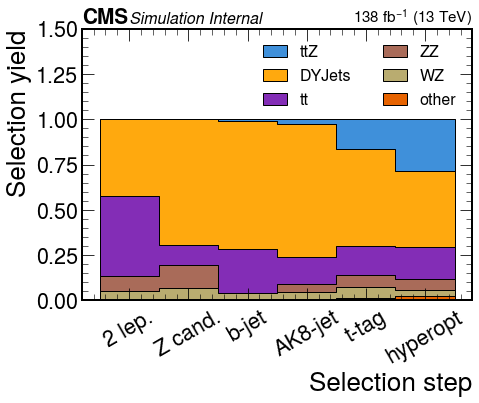

In [7]:
path1 = 'output/ttZ2l_lep/'
path2 = 'output/ttZ2l_Zreq/'
path3 = 'output/ttZ2l_noboost/'
path4 = 'output/ttZ2l_nottag/'
path5 = 'output/ttZ2l_ttag/'
path6 = 'output/ttZ2l_MWPttag/'
labels = ['other', 'WZ', 'ZZ', 'tt', 'DYJets', 'ttZ']
paths = [path1, path2, path3, path4, path5, path6]

num_list, w2_list = get_flow(paths, get_ttZ2lnum)
interval_labels = ['2 lep.', 'Z cand.', 'b-jet', 'AK8-jet', 't-tag', 'hyperopt']

plot_flow(num_list, labels, interval_labels)

In [ ]:
path1 = 'output/ttZ3l_lep'
path2 = 'output/ttZ3l_Zreq'
path3 = 'output/ttZ3l_noboost'
path4 = 'output/ttZ3l_nottag'
path5 = 'output/ttZ3l_LWPttag'
labels = ['other','tt',  'WZ',  'tWZ', 'ttH', 'ttZ']
paths = [path1, path2, path3, path4, path5]

num_list, w2_list = get_flow(paths, get_ttZ3lnum)
interval_labels = ['3 lep.', 'Z cand.', 'b-jet', 'AK8-jet', 't-tag']

plot_flow(num_list, labels, interval_labels)

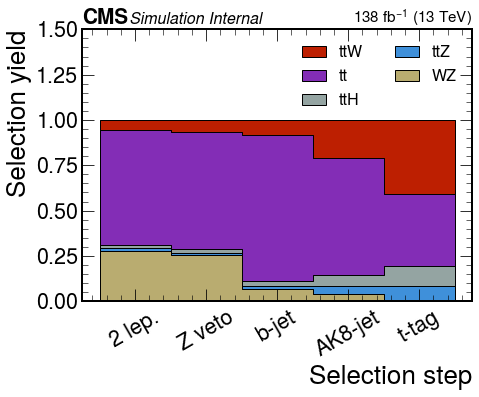

In [ ]:
path1 = 'output/ttW_lep/'
path2 = 'output/ttW_Zvet/'
path3 = 'output/ttW_noboost/'
path4 = 'output/ttW_nottag/'
path5 = 'output/ttW_LWPttag/'
labels = ['WZ', 'ttZ', 'ttH', 'tt', 'ttW']
paths = [path1, path2, path3, path4, path5]

num_list, w2_list = get_flow(paths, get_ttWnum)
interval_labels = ['2 lep.', 'Z veto', 'b-jet', 'AK8-jet', 't-tag']

plot_flow(num_list, labels, interval_labels)